In [ ]:
!pip install jupyter_bokeh

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [ ]:
#df2 = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")


In [ ]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

    pn.state.cache['data'] = df.copy()

else:

    df = pn.state.cache['data']

In [ ]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,0.531,0.033,8.396,0.547,6.962,...,NaN,0.110,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    47415 non-null  object 
 1   year                                       47415 non-null  int64  
 2   iso_code                                   39548 non-null  object 
 3   population                                 39414 non-null  float64
 4   gdp                                        15211 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            24684 non-null  float64
 10  co2_including_luc     

In [ ]:
df.shape

(47415, 79)

In [ ]:
df.size

3745785

In [ ]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [ ]:
null_values = df.isna().sum()
null_values.sort_values(ascending=False).head(35)

,0
other_co2_per_capita,44968
share_global_other_co2,44822
share_global_cumulative_other_co2,44822
other_industry_co2,44822
cumulative_other_co2,44822
consumption_co2_per_gdp,43106
consumption_co2_per_capita,43050
trade_co2_share,43018
trade_co2,43017
consumption_co2,42697


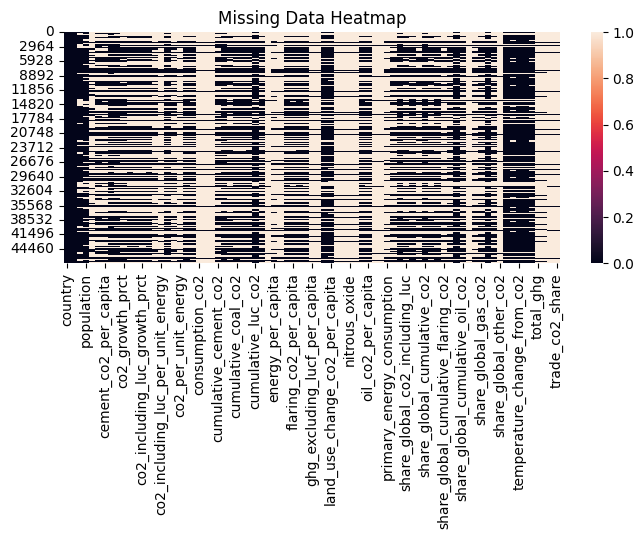

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), cbar=True)
plt.title('Missing Data Heatmap')
plt.show()


In [ ]:
missing_percentage = df.isnull().mean() * 100
high_missing_columns = missing_percentage[missing_percentage > 30].index.tolist()
print("Columns with more than 30% missing data:", high_missing_columns)



Columns with more than 30% missing data: ['gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2', 'pri

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix[['gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2', 'primary_energy_consumption', 'share_global_cement_co2', 'share_global_co2', 'share_global_co2_including_luc', 'share_global_coal_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_co2', 'share_global_cumulative_co2_including_luc', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2', 'share_global_flaring_co2', 'share_global_gas_co2', 'share_global_oil_co2', 'share_global_other_co2', 'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share']].sort_values(by='co2', ascending=False))



ValueError: could not convert string to float: 'Afghanistan'

as we dont find correlaton of categorical column so we coan do encoding for that, but for now i ill find numeric column and find their correlation, so lets forst check datatypes

In [ ]:
df.dtypes

,0
country,object
year,int64
iso_code,object
population,float64
gdp,float64
...,...
temperature_change_from_n2o,float64
total_ghg,float64
total_ghg_excluding_lucf,float64
trade_co2,float64


In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()


In [ ]:
correlation_matrix

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
year,1.000000,0.069914,0.079754,0.102981,0.312224,0.142780,0.046398,-0.009721,0.076471,0.010471,...,-0.726284,-0.003506,0.165236,0.154614,0.157873,0.167180,0.029770,0.032313,0.006118,0.064661
population,0.069914,1.000000,0.906843,0.802239,0.037464,0.842332,0.502810,-0.004865,0.908075,0.348481,...,0.590498,0.738238,0.938839,0.849670,0.883132,0.887780,0.945268,0.934041,-0.314998,-0.124726
gdp,0.079754,0.906843,1.000000,0.912824,0.077386,0.965254,0.311429,-0.002278,0.948413,0.171332,...,0.395960,0.672933,0.958469,0.959959,0.966761,0.976314,0.981821,0.980726,-0.070153,-0.056733
cement_co2,0.102981,0.802239,0.912824,1.000000,0.150730,0.890979,0.482679,-0.003283,0.853730,0.313276,...,0.405180,0.461275,0.853453,0.792499,0.818248,0.830563,0.917280,0.921456,-0.394426,-0.107764
cement_co2_per_capita,0.312224,0.037464,0.077386,0.150730,1.000000,0.141605,0.064110,-0.009446,0.096567,0.033119,...,-0.296477,-0.010834,0.089212,0.101050,0.099593,0.097290,0.091824,0.100188,-0.030735,-0.167459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temperature_change_from_n2o,0.167180,0.887780,0.976314,0.830563,0.097290,0.962422,0.426666,-0.005000,0.953415,0.271134,...,0.502179,0.648758,0.966588,0.980009,0.987345,1.000000,0.977843,0.976758,-0.033170,-0.125654
total_ghg,0.029770,0.945268,0.981821,0.917280,0.091824,0.990723,0.465489,-0.012550,0.996540,0.295555,...,0.937712,0.972068,0.988882,0.967913,0.983110,0.977843,1.000000,0.997862,-0.182024,-0.117277
total_ghg_excluding_lucf,0.032313,0.934041,0.980726,0.921456,0.100188,0.996811,0.461929,-0.013050,0.996665,0.292195,...,0.943873,0.970251,0.981427,0.970731,0.983016,0.976758,0.997862,1.000000,-0.171555,-0.113502
trade_co2,0.006118,-0.314998,-0.070153,-0.394426,-0.030735,-0.130611,-0.357979,-0.038052,-0.180992,-0.227191,...,-0.259807,-0.053840,-0.207706,0.000514,-0.056494,-0.033170,-0.182024,-0.171555,1.000000,0.143002


In [ ]:
df.describe()


,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,47415.000000,3.941400e+04,1.521100e+04,23764.000000,22017.000000,30308.000000,28157.000000,24684.000000,23320.000000,23030.000000,...,2593.000000,41280.000000,37840.000000,41280.000000,41280.000000,37840.000000,6354.000000,6354.000000,4398.000000,4397.000000
mean,1926.781609,6.095120e+07,3.309008e+11,9.109400,0.066766,391.272161,5.868311,19.097573,534.225707,7.445586,...,19.199870,2.236230,0.002991,0.007369,0.010630,0.000490,790.430981,759.384745,-7.157874,20.338377
std,59.561600,3.289137e+08,3.090394e+12,66.662221,0.125316,1857.972724,59.929873,689.790696,2176.346564,98.354360,...,33.432368,9.115378,0.016277,0.041778,0.059565,0.002922,3610.534250,3531.641287,269.439711,52.772399
min,1750.000000,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,-2032.366000,-100.000000,-187.847000,-2334.695000,...,0.000000,-0.782000,-0.001000,0.000000,-0.001000,0.000000,-186.660000,0.010000,-2371.239000,-99.795000
25%,1883.000000,3.448688e+05,7.898213e+09,0.000000,0.000000,0.183000,0.000000,-0.847750,5.878750,-0.739750,...,0.249000,0.003000,0.000000,0.000000,0.000000,0.000000,8.450000,7.042500,-3.024750,-6.287000
50%,1930.000000,2.449992e+06,2.760856e+10,0.029000,0.008000,3.856000,0.026000,3.876000,27.679500,0.071000,...,1.431000,0.072000,0.000000,0.000000,0.000000,0.000000,38.285000,30.830000,1.478500,8.741000
75%,1976.000000,1.011714e+07,1.220233e+11,0.834000,0.093000,47.257000,0.872000,10.699250,124.716000,2.561000,...,19.405000,0.337000,0.001000,0.001000,0.001000,0.000000,153.595000,131.512500,9.124000,32.512000
max,2022.000000,7.975105e+09,1.301126e+14,1692.404000,2.574000,37149.785000,1813.064000,102318.508000,41637.617000,2011.781000,...,100.000000,100.000000,0.417000,1.136000,1.635000,0.083000,49880.602000,48089.621000,2186.267000,576.482000


**Identify Highly Correlated Columns**

In [ ]:
# Assuming 'target_column' is your dependent variable
correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix['co2'].sort_values(ascending=False).head(10)


In [ ]:
target_corr

,co2
co2,1.000000
total_ghg_excluding_lucf,0.996811
consumption_co2,0.996530
primary_energy_consumption,0.996086
total_ghg,0.990723
temperature_change_from_ghg,0.973079
co2_including_luc,0.973077
temperature_change_from_co2,0.966825
oil_co2,0.966604
gdp,0.965254


In [ ]:
high_corr_columns = target_corr[target_corr.abs() > 0.5]
print(high_corr_columns)


co2                            1.000000
total_ghg_excluding_lucf       0.996811
consumption_co2                0.996530
primary_energy_consumption     0.996086
total_ghg                      0.990723
temperature_change_from_ghg    0.973079
co2_including_luc              0.973077
temperature_change_from_co2    0.966825
oil_co2                        0.966604
gdp                            0.965254
Name: co2, dtype: float64


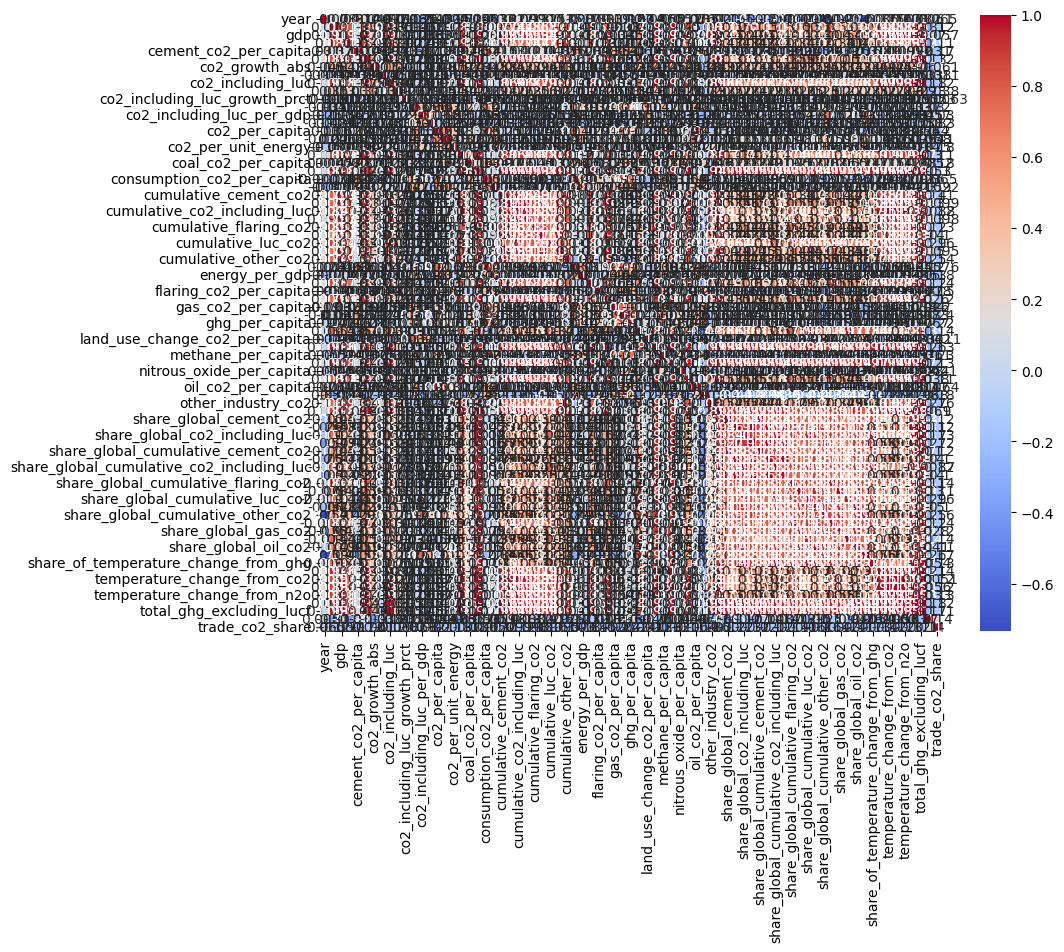

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


**Identify Columns with Outliers**

In [ ]:
Q1 = df[high_corr_columns.index].quantile(0.25)
Q3 = df[high_corr_columns.index].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[high_corr_columns.index] < (Q1 - 1.5 * IQR)) | (df[high_corr_columns.index] > (Q3 + 1.5 * IQR))
print(outliers.sum())  # Number of outliers per column


co2                            5355
total_ghg_excluding_lucf       1090
consumption_co2                 782
primary_energy_consumption     1547
total_ghg                      1025
temperature_change_from_ghg    7896
co2_including_luc              4198
temperature_change_from_co2    6246
oil_co2                        4094
gdp                            2180
dtype: int64


In [ ]:
import numpy as np
import pandas as pd

# Columns to handle outliers and missing values
high_corr_columns = ['co2', 'total_ghg_excluding_lucf', 'consumption_co2',
                     'primary_energy_consumption', 'total_ghg',
                     'temperature_change_from_ghg', 'co2_including_luc',
                     'temperature_change_from_co2', 'oil_co2', 'gdp']

# Step 1: Calculate IQR and cap outliers for high correlation columns
Q1 = df[high_corr_columns].quantile(0.25)
Q3 = df[high_corr_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in high correlation columns (replace values outside bounds with bounds)
for col in high_corr_columns:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

# Step 2: Impute missing values with median after outlier handling
for col in high_corr_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Check if missing values have been filled
print(df[high_corr_columns].isnull().sum())


co2                            0
total_ghg_excluding_lucf       0
consumption_co2                0
primary_energy_consumption     0
total_ghg                      0
temperature_change_from_ghg    0
co2_including_luc              0
temperature_change_from_co2    0
oil_co2                        0
gdp                            0
dtype: int64


<ipython-input-32-993c8192588b>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


**Handling Weakly Correlated Columns**

In [ ]:
# Step 1: Select weakly correlated columns
all_columns = df.columns.tolist()
weak_corr_columns = [col for col in all_columns if col not in high_corr_columns]

In [ ]:
# Step 2: Filter only numeric columns from weakly correlated columns
numeric_weak_corr_columns = df[weak_corr_columns].select_dtypes(include=[np.number]).columns

# Step 3: Calculate IQR for numeric weakly correlated columns
Q1_weak = df[numeric_weak_corr_columns].quantile(0.25)
Q3_weak = df[numeric_weak_corr_columns].quantile(0.75)
IQR_weak = Q3_weak - Q1_weak


In [ ]:
# Option 2: Cap outliers instead of removing
for col in numeric_weak_corr_columns:
    df[col] = np.where(df[col] > df[col].quantile(0.95), df[col].quantile(0.95), df[col])
    df[col] = np.where(df[col] < df[col].quantile(0.05), df[col].quantile(0.05), df[col])


In [ ]:
# Step 5: Impute missing values for numeric weakly correlated columns
for col in numeric_weak_corr_columns:
    df[col].fillna(df[col].median(), inplace=True)


<ipython-input-39-d2b347ad780c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
print(df.isnull().sum())


country                           0
year                              0
iso_code                       7867
population                        0
gdp                               0
                               ... 
temperature_change_from_n2o       0
total_ghg                         0
total_ghg_excluding_lucf          0
trade_co2                         0
trade_co2_share                   0
Length: 79, dtype: int64


In [ ]:
# Dropping the 'iso_code' column from the DataFrame
df.drop(columns=['iso_code'], inplace=True)

In [ ]:
df['gdp_per_capita'] = np.where(df['population']!= 0, df['gdp']/ df['population'], 0)


In [ ]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

In [ ]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2022, step=5, value=1850)
year_slider

IntSlider(end=2022, name='Year slider', start=1750, step=5, value=1850)

In [ ]:
# Radio buttons for CO2 measures
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['co2', 'co2_per_capita',],
    button_type='success')

In [ ]:
continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [ ]:
co2_pipeline


In [ ]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title="CO2 emission by continent")
co2_plot

**Table - CO2 emission over time by continent**

In [ ]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
co2_table

**CO2 vs GDP scatterplot**

In [ ]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        (~ (idf.country.isin(continents)))
    ]
    .groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [ ]:
co2_vs_gdp_scatterplot_pipeline


In [ ]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita',
                                                                y='co2',
                                                                by='country',
                                                                size=80, kind="scatter",
                                                                alpha=0.7,
                                                                legend=False,
                                                                height=500,
                                                                width=500)
co2_vs_gdp_scatterplot

**Bar chart with CO2 sources by continent**

In [ ]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['coal_co2', 'oil_co2', 'gas_co2'],
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year', 'country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [ ]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar',
                                                     x='country',
                                                     y=yaxis_co2_source,
                                                     title='CO2 source by continent')
co2_source_bar_plot

In [ ]:
!pip install panel


In [ ]:
#Layout using Template
import panel as pn
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard',
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"),
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."),
             pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2,
                           co2_plot.panel(width=700), margin=(0,25)),
                 co2_table.panel(width=500)),
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)),
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.show();

Launching server at http://localhost:36959
